In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

Before dropping output : 80
X Dimensions : (1460, 79)
Columns with different dtypes : 
float64     3
int64      34
object     43
dtype: int64
           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("T

"sns.violinplot(x=iowa_house_data['HouseStyle'], y=iowa_house_data['SalePrice'], hue=iowa_house_data['BldgType'], \n               #inner='box', palette='Set3')"

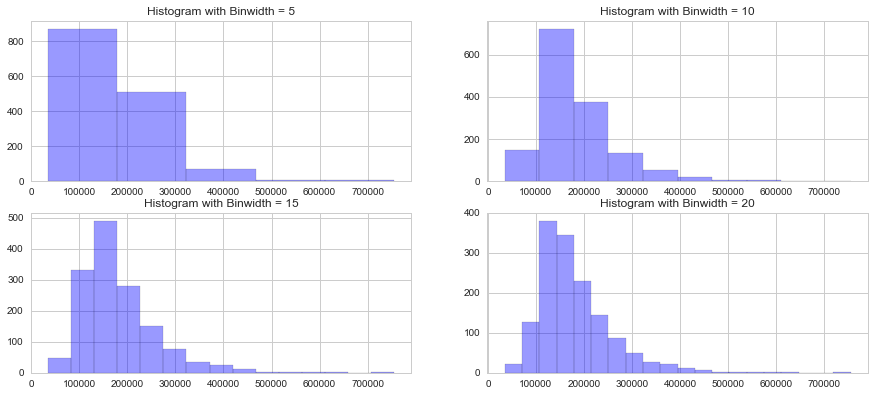

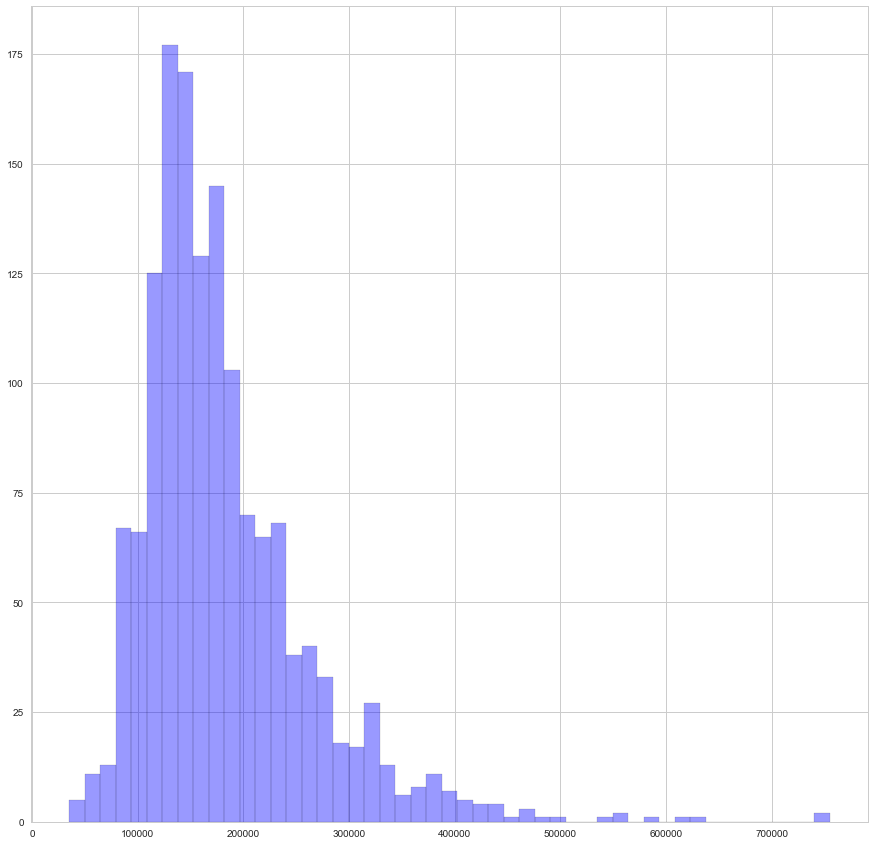

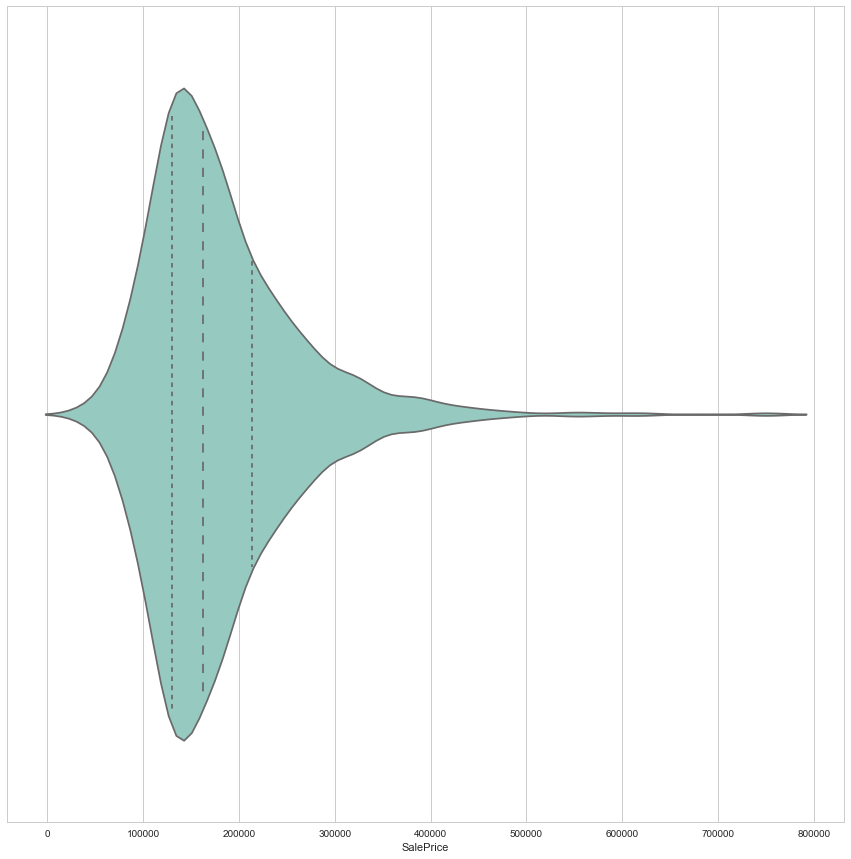

In [3]:
input_path = 'data/train.csv'
iowa_house_data = pd.read_csv(input_path, index_col='Id')
sns.set(style='whitegrid')
plt.subplots(figsize=(15,10))

# 1. Split INPUT & OUTPUT variables from DATA.
Y = pd.DataFrame(iowa_house_data.SalePrice) # OUTPUT
print('Before dropping output : ' + str(iowa_house_data.shape[1])) # Number of columns
X = iowa_house_data.drop(['SalePrice'], axis = 1) # This dont drop SalePrice from iowa_house_data. Returns New Object.
print('X Dimensions : ' + str(X.shape))
print('Columns with different dtypes : \n' + str(iowa_house_data.get_dtype_counts()))

# 2. Understand how output is distributed.
for i, binwidth in enumerate([5, 10, 15, 20]):
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    sns.distplot(Y, hist=True, kde=False, bins=binwidth, color='blue', hist_kws={'edgecolor':'black'})
    ax.set_title('Histogram with Binwidth = %d' % binwidth)

plt.subplots(figsize=(15,15))
sns.distplot(Y, kde=False, color='blue', hist_kws={'edgecolor':'black'})

print(Y.describe())
plt.subplots(figsize=(15,15))
sns.violinplot(x=Y.SalePrice, inner='quartile', palette='Set3', scale='width',)


# 3. Understand Input distribution

    

''' Horizontal Violin Plot. Just switched SalePrice into X-axis & BldgType into Y-axis 
    to convert to Horizontal.
    Another way is to use ORIENT=(h|v) attribute in violinplot.
'''
'''sns.violinplot(x=iowa_house_data['SalePrice'], y=iowa_house_data['BldgType'], 
               inner='quartile', palette='Set3', scale='width',)'''
   
# Vertical Violin plot
'''sns.violinplot(x=iowa_house_data['HouseStyle'], y=iowa_house_data['SalePrice'], hue=iowa_house_data['BldgType'], 
               #inner='box', palette='Set3')'''


Numeric Features : 
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Features that have Highest Positive Correlation with SalePrice :
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
Features that have Highest Negative Corre

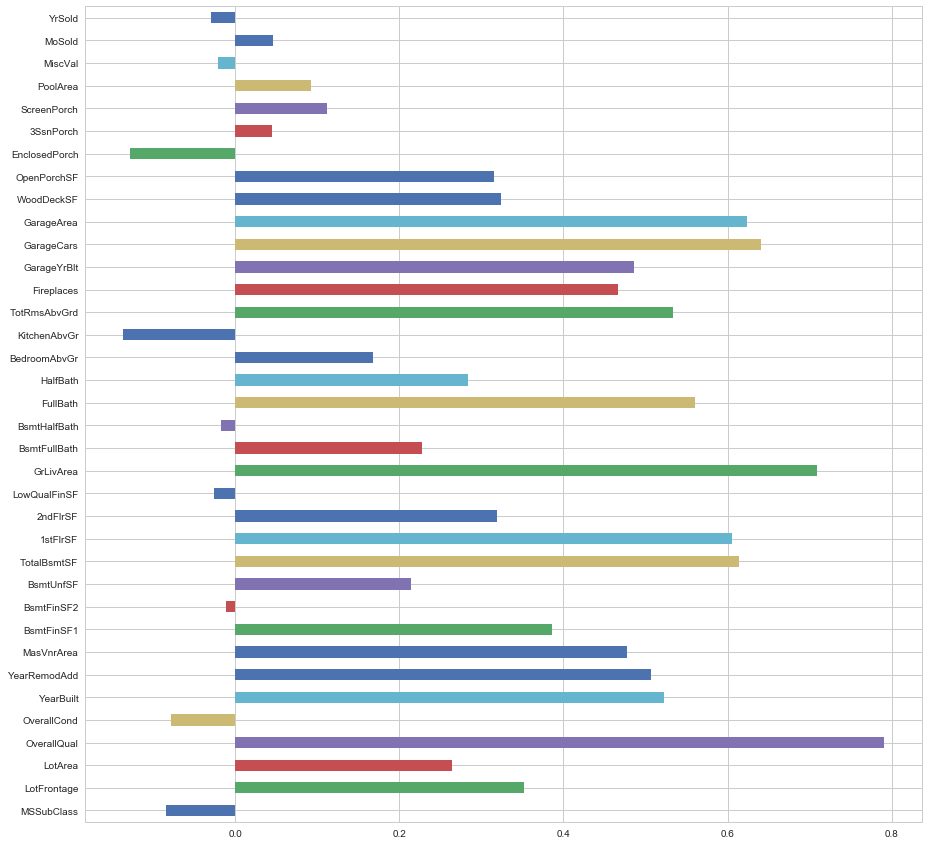

In [4]:
# 4. Uderstand Numerical features & output correlation
numeric_features = iowa_house_data.select_dtypes(include=[np.number]) # return only numeric features N 
print('Numeric Features : \n' + str(numeric_features.columns))
corr = numeric_features.corr() # This returns a DATAFRAME of size N x N (N=no of numeric columns).
print('Features that have Highest Positive Correlation with SalePrice :')
print(corr.SalePrice.sort_values(ascending=False)[:10])
print('Features that have Highest Negative Correlation with SalePrice :')
print(corr.SalePrice.sort_values(ascending=True)[:10])
plt.subplots(figsize=(15,15))
corr.SalePrice[:-1].plot(kind='barh') # Plot the correlation indexes except for SalePrice since it will be ALWAYS 1.


numeric_predictors = corr.iloc[:-1,:-1]
threshold = 0.5
''' From numeric_predictors matrix, select relations which have high 
correlation greater than 0.5. Also don't select relation with value = 1.0 
because those are self correlations. we can add as many conditions as below.
numeric_predictors[abs(numeric_predictors) > threshold][numeric_predictors != 1.0]
[numeric_predictors > 0.8]
'''
imp_num_corrs = (numeric_predictors[abs(numeric_predictors) > threshold][numeric_predictors != 1.0])\
                    .unstack().dropna().to_dict()
    
'''
imp_num_corrs contains Duplicates keys such as ('OverallQual', 'YearBuilt') & ('YearBuilt', 'OverallQual').
DELETE THEM using Set operation below
'''
unique_imp_num_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), imp_num_corrs[key]) \
                          for key in imp_num_corrs])), columns=['Attribute Pair', 'Correlation'])
print(unique_imp_num_corrs)

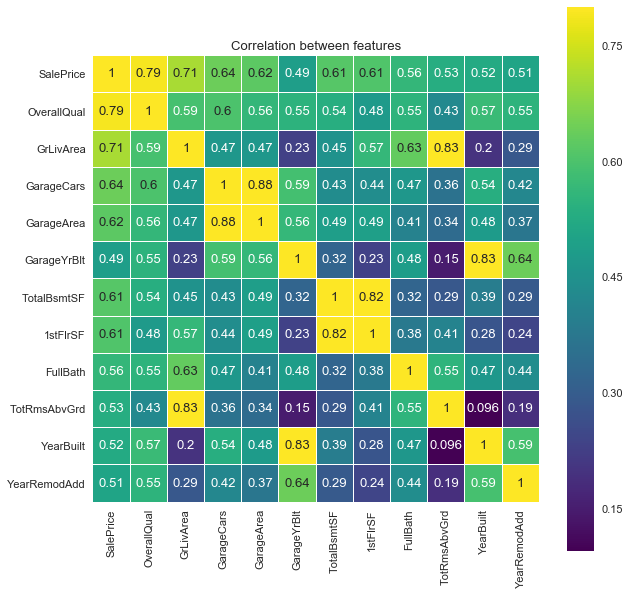

In [5]:
corrMatrix=iowa_house_data[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

              Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageType         5.547945
GarageYrBlt        5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtExposure       2.602740
BsmtFinType2       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493


'\nGroup by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood\n\nall_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(\n    lambda x: x.fillna(x.median()))\n'

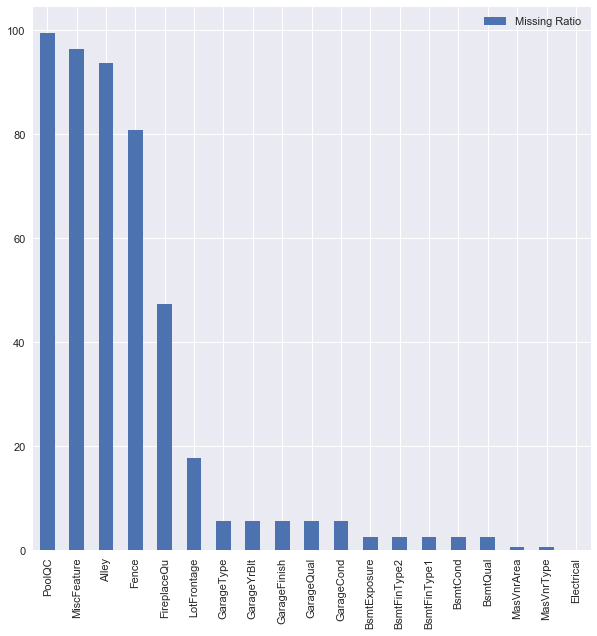

In [6]:
''' Handle Missing Data'''

# Find how much data is missing from each feature
null_columns=iowa_house_data.columns[iowa_house_data.isnull().any()]
missing_ratio = (iowa_house_data[null_columns].isnull().sum()/len(iowa_house_data)) * 100

missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))
# iowa_house_data[null_columns].isnull().sum().sort_values(ascending=True)

missing_data.sort_values(by='Missing Ratio',ascending=False).plot(kind='bar',figsize=(10, 10))


'''
Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
'''